In [60]:
import tensorflow as tf

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-04-10 11:48:02--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0.001s  

2024-04-10 11:48:02 (2.45 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [63]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [64]:
# Load in the data

data = pd.read_csv("moore.csv", header=None).to_numpy()

In [65]:
data[:10]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]])

In [66]:
X = data[:,0].reshape(-1,1) # making an N x D
Y = data[:, 1]

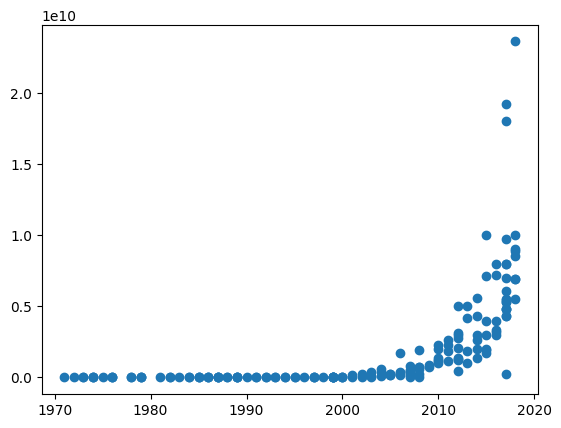

In [67]:
# Plot the data
plt.scatter(X, Y)

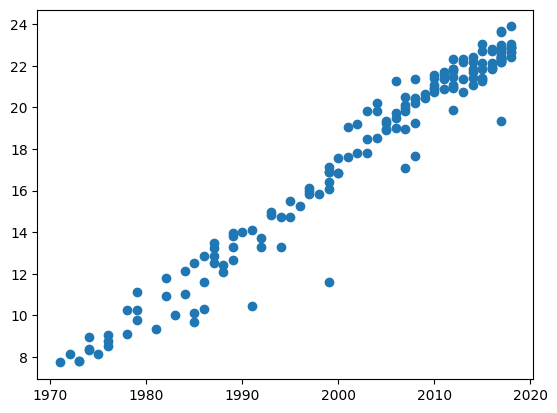

In [68]:
Y = np.log(Y)
plt.scatter(X, Y)

In [69]:
X = X - X.mean()

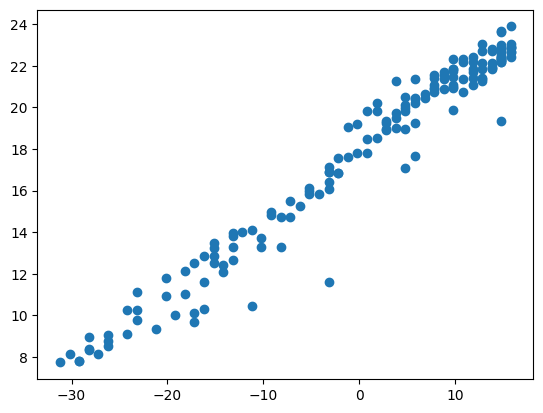

In [70]:
plt.scatter(X, Y)

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [80]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
              loss='mse',
)

In [81]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [82]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.7859 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.8415 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 1.1289 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.9249 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.9170 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 1.0894 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 1.2302 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 1.1728 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 1.3683 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 1.2716 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 1.2655 - learning_rate: 0.0010
Epoch 12/200
6/6 ━━━

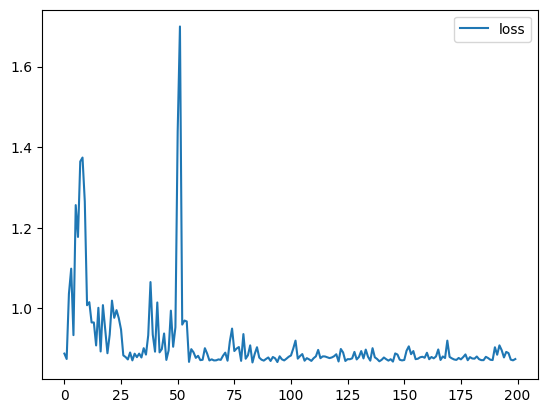

In [83]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [84]:
model.layers

[<Dense name=dense_3, built=True>]

In [85]:
model.layers[0].get_weights()

[array([[0.3387404]], dtype=float32), array([17.751968], dtype=float32)]

In [87]:
model.layers[0].get_weights()[0][0, 0]

0.3387404